# Load Modules

In [2]:
import pandas as pd 
from matplotlib import pyplot as plt 
import numpy as np 
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier 
import sklearn.impute._iterative as itimp
from sklearn.model_selection import train_test_split 
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Load Data

In [3]:
df_ulx = pd.read_csv('data_v2/csc_ulx_var.csv').drop(columns=['index'])
df_agn = pd.read_csv('data_v2/csc_agn_var.csv').drop(columns=['index'])
df_star = pd.read_csv('data_v2/csc_star_var.csv').drop(columns=['index'])
df_yso = pd.read_csv('data_v2/csc_spitz_yso_var.csv').drop(columns=['index'])
df_pl = pd.read_csv('data_v2/csc_atnf_pl_var.csv').drop(columns=['index'])
df_hmxb = pd.read_csv('data_v2/csc_hmxb_var.csv')
df = pd.concat([df_agn , df_star , df_yso  , df_hmxb , df_pl , df_ulx] , axis=0).reset_index(drop=True)
#df = pd.concat([df_agn , df_star , df_yso ] , axis=0).reset_index(drop=True)

# df = df.replace({
#     "ULX" : "other" , 
#     "PULSAR" : "other" , 
#     "HMXB" : "other"
# })
df = df.set_index('csc_index')
df = df[df['conf_flag']==0]
df 

,class,catalog,cat_name,cat_ra,cat_dec,offset,name,ra,dec,conf_flag,...,var_inter_hard_prob_ms,var_intra_index_b,var_intra_prob_b,ks_intra_prob_b,kp_intra_prob_b,var_inter_index_b,var_inter_prob_b,var_inter_sigma_b,gal_l2,gal_b2
csc_index,,,,,,,,,,,,,,,,,,,,,
CSC_11572,AGN,VERONCAT,CXOMP J10569-0340,164.23170,-3.67500,0.049579,2CXO J105655.6-034030,164.231714,-3.675001,0,...,NaN,0.0,0.186991,0.964371,0.990955,NaN,NaN,NaN,256.603700,48.621078
CSC_538,AGN,VERONCAT,SDSS J12257+0955,186.44460,9.92220,0.068733,2CXO J122546.7+095519,186.444585,9.922188,0,...,NaN,0.0,0.109626,0.620790,0.542864,NaN,NaN,NaN,282.344623,71.760795
CSC_26073,AGN,VERONCAT,COSM J10018+0238,150.45670,2.64810,0.075443,2CXO J100149.6+023853,150.456703,2.648121,0,...,0.334316,5.0,0.778887,0.972437,0.862588,5.0,0.853927,0.000002,236.598558,42.652713
CSC_603,AGN,VERONCAT,Q 1234+1217,189.25620,12.01500,0.082762,2CXO J123701.4+120053,189.256221,12.014991,0,...,NaN,0.0,0.130834,0.931967,0.894987,NaN,NaN,NaN,289.622427,74.513091
CSC_40250,AGN,VERONCAT,IW3_0817_0556,189.15250,62.22970,0.090477,2CXO J123636.6+621346,189.152553,62.229696,0,...,0.604172,5.0,0.858668,0.989439,0.956339,8.0,1.000000,0.000002,125.928394,54.812203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CSC_2311,YSO,SPITZ,[WWB2011] 202,134.87504,-47.44274,22.003029,2CXO J085928.3-472620,134.868015,-47.438896,0,...,NaN,8.0,0.999999,0.999972,0.999768,NaN,NaN,NaN,267.928387,-0.961928
CSC_2298,YSO,SPITZ,[WWB2011] 494,134.81671,-47.51951,22.419815,2CXO J085918.0-473117,134.825370,-47.521650,0,...,NaN,0.0,0.239173,0.002413,0.003502,NaN,NaN,NaN,267.971971,-1.037954
CSC_2251,YSO,SPITZ,[WWB2011] 576,134.76567,-47.46654,24.579196,2CXO J085904.0-472735,134.767046,-47.459776,0,...,NaN,7.0,0.999849,0.992894,0.999999,NaN,NaN,NaN,267.899396,-1.027180


In [4]:
df['class'].value_counts()

STAR    1171
AGN      969
YSO       86
Name: class, dtype: int64

In [5]:
feat_to_use = ['flux_aper_b',
 'flux_aper_lolim_b',
 'flux_aper_hilim_b',
 'flux_aper_h',
 'flux_aper_lolim_h',
 'flux_aper_hilim_h',
 'flux_aper_m',
 'flux_aper_lolim_m',
 'flux_aper_hilim_m',
 'flux_aper_s',
 'flux_aper_lolim_s',
 'flux_aper_hilim_s',
 'flux_aper_u',
 'flux_aper_lolim_u',
 'flux_aper_hilim_u',
 'hard_hm',
 'var_inter_hard_prob_hm',
 'var_inter_hard_sigma_hm',
 'hard_hs',
 'var_inter_hard_prob_hs',
 'hard_ms',
 'var_inter_hard_prob_ms',
 'var_intra_index_b',
 'var_intra_prob_b',
 'ks_intra_prob_b',
 'kp_intra_prob_b',
 'var_inter_index_b',
 'var_inter_prob_b',
 'var_inter_sigma_b',
 'gal_l2',
 'gal_b2']
feat_to_use
x = df[feat_to_use] 
index = x.index.to_list()
info_col = ['class' , 'cat_name' , 'cat_ra' , 'cat_dec' , 'name' , 'ra' , 'dec']
id = df[info_col]
y = df['class']
imputer = itimp.IterativeImputer()
x = imputer.fit_transform(x)
x = pd.DataFrame(x , columns = feat_to_use)
display(x)
eps = 1e-20
flux_cols = ['flux_aper_b',	'flux_aper_lolim_b' ,	'flux_aper_hilim_b' , 	'flux_aper_h' , 	'flux_aper_lolim_h' , 	'flux_aper_hilim_h' , 	'flux_aper_m' , 	'flux_aper_lolim_m' , 	'flux_aper_hilim_m' , 	'flux_aper_s']
#x.loc[:, 'flux_aper_avg_b'] =  np.log10(x.loc[:, 'flux_aper_avg_b']+eps)
#x.loc[:, 'flux_aper_avg_hilim_b'] =  np.log10(x.loc[:, 'flux_aper_avg_hilim_b']+eps)
#x.loc[:, 'flux_aper_avg_lolim_b'] =  np.log10(x.loc[:, 'flux_aper_avg_lolim_b']+eps)
#x = x.replace(np.nan , 0 )
#for f in flux_cols:
#    x.loc[: , f] = np.log10(x.loc[: , f]+eps)
#x = x.replace(np.nan , 0)
x.insert(0 , 'csc_index' , index)
x = x.set_index('csc_index')
x 

,flux_aper_b,flux_aper_lolim_b,flux_aper_hilim_b,flux_aper_h,flux_aper_lolim_h,flux_aper_hilim_h,flux_aper_m,flux_aper_lolim_m,flux_aper_hilim_m,flux_aper_s,...,var_inter_hard_prob_ms,var_intra_index_b,var_intra_prob_b,ks_intra_prob_b,kp_intra_prob_b,var_inter_index_b,var_inter_prob_b,var_inter_sigma_b,gal_l2,gal_b2
0,2.219669e-14,2.073667e-14,2.357083e-14,1.319730e-14,1.122185e-14,1.505655e-14,3.651703e-15,3.203978e-15,4.071445e-15,5.418585e-15,...,0.597543,0.0,0.186991,0.964371,0.990955,6.532782,0.920961,0.000091,256.603700,48.621078
1,1.218088e-13,1.027922e-13,1.408254e-13,4.842081e-14,3.285698e-14,6.398465e-14,2.160163e-14,1.558150e-14,2.726763e-14,5.627924e-14,...,0.610708,0.0,0.109626,0.620790,0.542864,5.372818,0.806600,0.000085,282.344623,71.760795
2,8.680897e-15,7.230966e-15,1.005028e-14,5.023837e-15,3.525500e-15,6.434037e-15,2.496626e-15,2.056045e-15,2.937207e-15,1.765330e-15,...,0.334316,5.0,0.778887,0.972437,0.862588,5.000000,0.853927,0.000002,236.598558,42.652713
3,1.184754e-13,1.056502e-13,1.313006e-13,4.178469e-14,2.462312e-14,5.894627e-14,2.691549e-14,2.484649e-14,2.898449e-14,5.168625e-14,...,0.621236,0.0,0.130834,0.931967,0.894987,6.642828,0.935728,0.000094,289.622427,74.513091
4,8.291394e-15,7.701934e-15,8.880855e-15,4.302466e-15,3.710009e-15,4.894924e-15,1.808025e-15,1.616534e-15,1.999517e-15,2.211427e-15,...,0.604172,5.0,0.858668,0.989439,0.956339,8.000000,1.000000,0.000002,125.928394,54.812203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2221,1.806899e-14,1.605256e-14,2.008542e-14,1.670430e-14,1.444807e-14,1.896054e-14,1.425406e-15,1.090016e-15,1.739833e-15,9.952469e-17,...,0.650349,8.0,0.999999,0.999972,0.999768,7.051621,0.945739,0.000134,267.928387,-0.961928
2222,3.358149e-15,2.259118e-15,4.457180e-15,3.431125e-15,2.308212e-15,4.554039e-15,1.299591e-14,1.148328e-14,1.451617e-14,5.909025e-14,...,0.498236,0.0,0.239173,0.002413,0.003502,2.568912,0.494262,0.000240,267.971971,-1.037954
2223,6.173581e-15,4.676956e-15,7.670207e-15,5.861046e-15,4.102732e-15,7.521676e-15,5.671999e-16,3.426833e-16,7.917165e-16,-4.116639e-14,...,0.583571,7.0,0.999849,0.992894,0.999999,6.866957,0.943645,0.000084,267.899396,-1.027180
2224,1.749297e-14,1.483691e-14,1.999279e-14,1.665817e-14,1.383231e-14,1.948402e-14,1.493197e-15,1.070124e-15,1.891382e-15,0.000000e+00,...,0.645297,8.0,0.999943,0.999999,0.999993,7.071211,0.952433,0.000107,267.914829,-1.143612


,flux_aper_b,flux_aper_lolim_b,flux_aper_hilim_b,flux_aper_h,flux_aper_lolim_h,flux_aper_hilim_h,flux_aper_m,flux_aper_lolim_m,flux_aper_hilim_m,flux_aper_s,...,var_inter_hard_prob_ms,var_intra_index_b,var_intra_prob_b,ks_intra_prob_b,kp_intra_prob_b,var_inter_index_b,var_inter_prob_b,var_inter_sigma_b,gal_l2,gal_b2
csc_index,,,,,,,,,,,,,,,,,,,,,
CSC_11572,2.219669e-14,2.073667e-14,2.357083e-14,1.319730e-14,1.122185e-14,1.505655e-14,3.651703e-15,3.203978e-15,4.071445e-15,5.418585e-15,...,0.597543,0.0,0.186991,0.964371,0.990955,6.532782,0.920961,0.000091,256.603700,48.621078
CSC_538,1.218088e-13,1.027922e-13,1.408254e-13,4.842081e-14,3.285698e-14,6.398465e-14,2.160163e-14,1.558150e-14,2.726763e-14,5.627924e-14,...,0.610708,0.0,0.109626,0.620790,0.542864,5.372818,0.806600,0.000085,282.344623,71.760795
CSC_26073,8.680897e-15,7.230966e-15,1.005028e-14,5.023837e-15,3.525500e-15,6.434037e-15,2.496626e-15,2.056045e-15,2.937207e-15,1.765330e-15,...,0.334316,5.0,0.778887,0.972437,0.862588,5.000000,0.853927,0.000002,236.598558,42.652713
CSC_603,1.184754e-13,1.056502e-13,1.313006e-13,4.178469e-14,2.462312e-14,5.894627e-14,2.691549e-14,2.484649e-14,2.898449e-14,5.168625e-14,...,0.621236,0.0,0.130834,0.931967,0.894987,6.642828,0.935728,0.000094,289.622427,74.513091
CSC_40250,8.291394e-15,7.701934e-15,8.880855e-15,4.302466e-15,3.710009e-15,4.894924e-15,1.808025e-15,1.616534e-15,1.999517e-15,2.211427e-15,...,0.604172,5.0,0.858668,0.989439,0.956339,8.000000,1.000000,0.000002,125.928394,54.812203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CSC_2311,1.806899e-14,1.605256e-14,2.008542e-14,1.670430e-14,1.444807e-14,1.896054e-14,1.425406e-15,1.090016e-15,1.739833e-15,9.952469e-17,...,0.650349,8.0,0.999999,0.999972,0.999768,7.051621,0.945739,0.000134,267.928387,-0.961928
CSC_2298,3.358149e-15,2.259118e-15,4.457180e-15,3.431125e-15,2.308212e-15,4.554039e-15,1.299591e-14,1.148328e-14,1.451617e-14,5.909025e-14,...,0.498236,0.0,0.239173,0.002413,0.003502,2.568912,0.494262,0.000240,267.971971,-1.037954
CSC_2251,6.173581e-15,4.676956e-15,7.670207e-15,5.861046e-15,4.102732e-15,7.521676e-15,5.671999e-16,3.426833e-16,7.917165e-16,-4.116639e-14,...,0.583571,7.0,0.999849,0.992894,0.999999,6.866957,0.943645,0.000084,267.899396,-1.027180


In [6]:
y.value_counts()

STAR    1171
AGN      969
YSO       86
Name: class, dtype: int64

In [7]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.2 , stratify=y)

In [8]:
y_train.value_counts()

STAR    936
AGN     775
YSO      69
Name: class, dtype: int64

In [9]:
from imblearn.over_sampling import SMOTE , ADASYN , KMeansSMOTE
over = SMOTE(k_neighbors=2)
x_train_up , y_train_up = over.fit_resample(x_train , y_train)
y_train_up.value_counts()

STAR    936
AGN     936
YSO     936
Name: class, dtype: int64

In [10]:
clf = RandomForestClassifier(n_estimators=500)
clf.fit(x_train_up , y_train_up)
clf.score(x_test , y_test)

0.9618834080717489

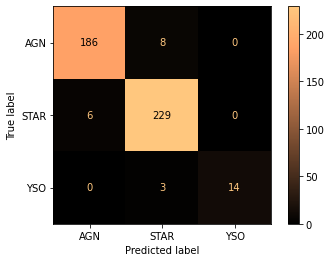

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = clf.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_ , )
disp.plot(cmap  = plt.cm.copper)
plt.show()

In [12]:
pred_prob = clf.predict_proba(x_test)
prob_df = pd.DataFrame(
    pred_prob , columns = clf.classes_
)
prob_df.insert(0 , 'true class' , y_test.to_list())
prob_df.insert(1 , 'pred_class' , clf.predict(x_test))
prob_df.to_csv('predicted_prob.csv')

In [13]:
pdf = prob_df.melt()
pdf 

,variable,value
0,true class,AGN
1,true class,STAR
2,true class,AGN
3,true class,AGN
4,true class,STAR
...,...,...
2225,YSO,0
2226,YSO,0
2227,YSO,0.002
2228,YSO,0.012


In [14]:
pred_cl = clf.predict(x_test)
pred_prob = [np.amax(el) for el in clf.predict_proba(x_test)]
prob_df_2 = pd.DataFrame({
    "pred_class" : pred_cl , 
    "pred_prob" : pred_prob
})


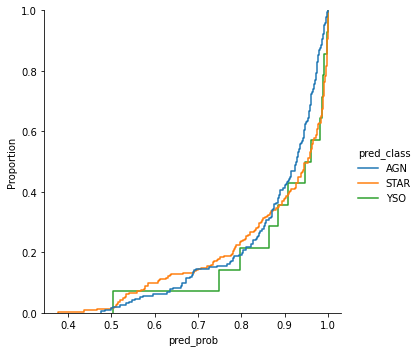

In [15]:
sns.displot(
    data = prob_df_2,
    x = 'pred_prob' , 
    hue = 'pred_class' , 
    kind = 'ecdf'
)
plt.show()

In [16]:
prob_df_2

,pred_class,pred_prob
0,AGN,0.976000
1,STAR,0.944000
2,AGN,0.872000
3,AGN,0.952000
4,STAR,0.992000
...,...,...
441,AGN,0.996000
442,STAR,1.000000
443,AGN,0.994000
444,STAR,0.886000


In [17]:
prob_df

,true class,pred_class,AGN,STAR,YSO
0,AGN,AGN,0.976,0.024000,0.000000
1,STAR,STAR,0.050,0.944000,0.006000
2,AGN,AGN,0.872,0.128000,0.000000
3,AGN,AGN,0.952,0.048000,0.000000
4,STAR,STAR,0.008,0.992000,0.000000
...,...,...,...,...,...
441,AGN,AGN,0.996,0.004000,0.000000
442,STAR,STAR,0.000,1.000000,0.000000
443,AGN,AGN,0.994,0.004000,0.002000
444,STAR,STAR,0.102,0.886000,0.012000


In [18]:

prob_df.insert(0 , 'true_class' , y_test)
prob_df.insert(1 , 'pred_class' , clf.predict(y_test))
prob_df

ValueError: cannot reindex from a duplicate axis

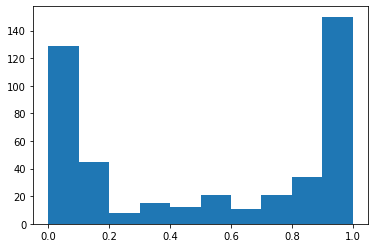

In [19]:
plt.hist(prob_df['STAR'])
plt.show()

In [23]:
feat_imp = clf.feature_importances_
feat_names = x_train.columns.to_list()
feat_imp_df = pd.DataFrame({
    "name" : feat_names , 
    "imp" :feat_imp
})
feat_imp_df = feat_imp_df.sort_values('imp' , ascending=False)
feat_imp_df[:16]['name'].to_list()

['gal_b2',
 'gal_l2',
 'hard_hs',
 'hard_hm',
 'hard_ms',
 'var_inter_prob_b',
 'var_inter_sigma_b',
 'var_intra_prob_b',
 'var_inter_index_b',
 'kp_intra_prob_b',
 'var_intra_index_b',
 'var_inter_hard_prob_hs',
 'ks_intra_prob_b',
 'var_inter_hard_sigma_hm',
 'var_inter_hard_prob_ms',
 'var_inter_hard_prob_hm']